<a href="https://colab.research.google.com/github/hmobley/liveproject_water/blob/master/Milestone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install sentinelsat
%pip install rasterio

     |████████████████████████████████| 18.3MB 48.0MB/s 


In [3]:
import rasterio
import glob
import os

In [4]:
# from https://stackoverflow.com/questions/38511444/python-download-files-from-google-drive-using-url
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

In [5]:
# load an image with rastario
file_id = '1o76QoBtn6ExxO8KgcCqdOiun_KsWoMJl'
destination = 'example_TCI_10m.jp2'
download_file_from_google_drive(file_id, destination)

In [8]:
def write_image(input, output, band):
    with rasterio.open(input) as src_dataset:
        with rasterio.open('example_TCI_10m.jp2', driver='JP2OpenJPEG') as dataset:
            array = dataset.read(band)
        # Get a copy of the source dataset's profile. Thus our
        # destination dataset will have the same dimensions,
        # number of bands, data type, and georeferencing as the
        # source dataset.
        kwds = src_dataset.profile

        # Change the format driver for the destination dataset to
        # 'GTiff', short for GeoTIFF.
        kwds['driver'] = 'GTiff'

        # Add GeoTIFF-specific keyword arguments.
        kwds['tiled'] = True
        kwds['blockxsize'] = 256
        kwds['blockysize'] = 256
        kwds['photometric'] = 'YCbCr'
        kwds['compress'] = 'JPEG'

        with rasterio.open(output, 'w', **kwds) as dst_dataset:
            # Write data to the destination dataset.
            dst_dataset.write(array.astype(rasterio.uint8), 1)


In [10]:
file_list = ['r1.tif', 'r2.tif', 'r3.tif']

In [11]:
[write_image('example_TCI_10m.jp2',f, band) for f,band in zip(file_list, [1,2,3])]

[None, None, None]

In [12]:
%ls

example_TCI_10m.jp2  r1.tif  r2.tif  r3.tif  sample_data/


In [23]:
# display the image
from IPython.display import Image
#Image(filename='r1.tif') 
import cv2
from matplotlib import pyplot as plt
import tensorflow as tf

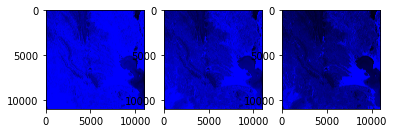

In [21]:
#fig, axis = plt.subplots(1,1,figsize=(6,6))
fig, axis = plt.subplots(1,3)
im1 = cv2.imread('r1.tif')
im2 = cv2.imread('r2.tif')
im3 = cv2.imread('r3.tif')
#tmp = axis[0].imshow(im1,cmap='gray')
#tmp = axis[1].imshow(im2,cmap='gray')
#tmp = axis[2].imshow(im3,cmap='gray')
tmp = axis[0].imshow(im1)
tmp = axis[1].imshow(im2)
tmp = axis[2].imshow(im3)

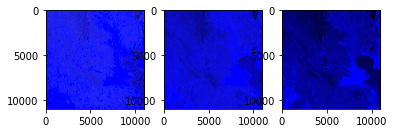

In [25]:
im1_adj = tf.image.adjust_gamma(im1,gamma=0.3)
im2_adj = tf.image.adjust_gamma(im2,gamma=0.5)
im3_adj = tf.image.adjust_gamma(im3,gamma=0.8)
fig, axis = plt.subplots(1,3)
tmp = axis[0].imshow(im1_adj)
tmp = axis[1].imshow(im2_adj)
tmp = axis[2].imshow(im3_adj)

In [ ]:
# manipulate the image with tensorflow

In [ ]:
# display the image

In [ ]:
# clean up files